In [2]:
# xresnet34, xresnet50, xse\_resnet50, xresnet101

In [3]:
#setup fastai notebook
!pip install -Uqq fastbook fastai
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 12.1MB/s 
     |████████████████████████████████| 194kB 59.5MB/s 
     |████████████████████████████████| 51kB 9.8MB/s 
     |████████████████████████████████| 1.1MB 57.6MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
Mounted at /content/gdrive


In [4]:
#@title imports
from fastbook import *
from fastai.vision.all import *

from fastprogress import fastprogress
from torchvision.models import *

In [5]:
# true for imagewoof, else imagenette
woof = True
if woof:
  path = untar_data(URLs.IMAGEWOOF)
else:
  path = untar_data(URLs.IMAGENETTE)

files = get_image_files(path/"train")
print("Training images: ", len(get_image_files(path/"train")),'(' ,round(len(get_image_files(path/"train"))*100/len(get_image_files(path)),2), '%)')
print("Validation images: ", len(get_image_files(path/"val")),'(' ,round(len(get_image_files(path/"val"))*100/len(get_image_files(path)),2), '%)')


Training images:  9025 ( 69.67 %)
Validation images:  3929 ( 30.33 %)


In [6]:
#setup data

#dls = ImageDataLoaders.from_folder(path, valid='val', item_tfms=RandomResizedCrop(128, min_scale=0.35), batch_tfms=Normalize.from_stats(*imagenet_stats))
#dls.show_batch()

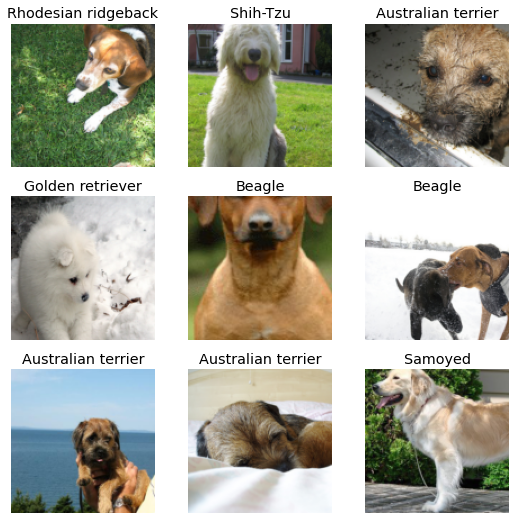

In [7]:
#get all the images
fnames = get_image_files(path)

#create dict to show better readable labels
if woof:
  lbl_dict = dict(
    n02093754='Australian terrier', 
    n02089973='Border terrier', 
    n02099601='Samoyed', 
    n02087394='Beagle', 
    n02105641='Shih-Tzu', 
    n02096294='English foxhound', 
    n02088364='Rhodesian ridgeback', 
    n02115641='Dingo', 
    n02111889='Golden retriever', 
    n02086240='Old English sheepdog'
  )
else:
  lbl_dict = dict(
    n01440764='tench',
    n02102040='English springer',
    n02979186='cassette player',
    n03000684='chain saw',
    n03028079='church',
    n03394916='French horn',
    n03417042='garbage truck',
    n03425413='gas pump',
    n03445777='golf ball',
    n03888257='parachute'
  )
#function to return human readable filenames
def label_func(fname):
  return lbl_dict[parent_label(fname)]



  #define a datablock
dblock = DataBlock(
      #set input to image and the goal to ctaegories
      blocks = (ImageBlock, CategoryBlock),
      #get names inside data block
      get_items = get_image_files,
      #label the items uin a readbale manner
      get_y=label_func,
      #split between test and trainining by folder two ages above
      splitter = GrandparentSplitter(valid_name='val'),
      #randomize the input & batch transform
      item_tfms = RandomResizedCrop(128, min_scale=0.35), 
      batch_tfms = Normalize.from_stats(*imagenet_stats)
      )

  #convert to dataloader
dls = dblock.dataloaders(path)
dls.show_batch()

xresnet34, xresnet50, xse\_resnet50, xresnet101


epoch,train_loss,valid_loss,accuracy,time
0,2.749591,2.573152,0.145839,01:14
1,2.579198,2.584739,0.174854,01:14
2,2.517034,2.193749,0.194452,01:14
3,2.291115,2.059635,0.240265,01:14
4,2.229822,2.045175,0.267753,01:14


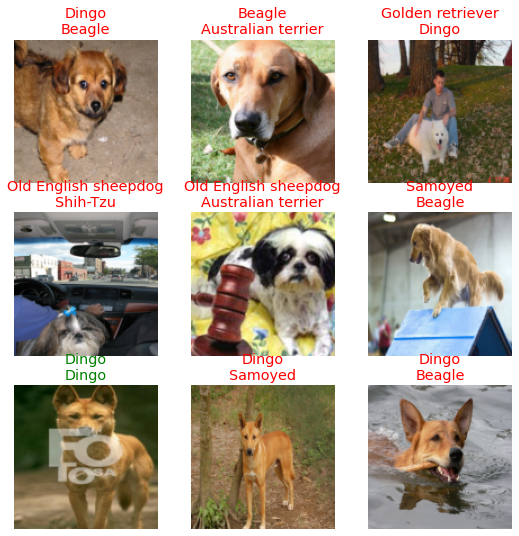

In [7]:
#train
print("xresnet34, xresnet50, xse\_resnet50, xresnet101")
learn = cnn_learner(dls, resnet34, metrics=accuracy, pretrained=False)
learn.fit_one_cycle(5, 5e-3)
learn.show_results()

xresnet50


epoch,train_loss,valid_loss,accuracy,time
0,2.630635,2.543832,0.217358,01:20
1,2.210692,2.224218,0.241283,01:20
2,1.893541,1.859693,0.357597,01:20
3,1.610736,1.397071,0.501909,01:20
4,1.405366,1.298675,0.560957,01:20


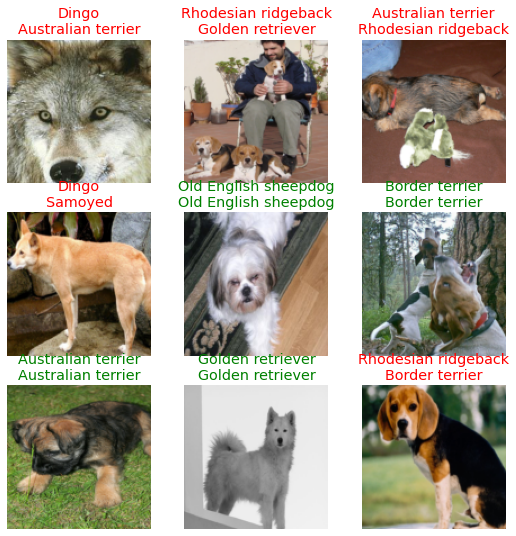

In [8]:
#train
print("xresnet50")
learn = cnn_learner(dls, xresnet50, metrics=accuracy, pretrained=False)
learn.fit_one_cycle(5, 5e-3)
learn.show_results()

xresnet50


epoch,train_loss,valid_loss,accuracy,time
0,2.691950,2.203779,0.257572,01:22
1,2.157167,2.265694,0.273097,01:23
2,1.865002,2.044253,0.316875,01:23
3,1.546883,1.421485,0.494782,01:24
4,1.313905,1.236029,0.560957,01:23


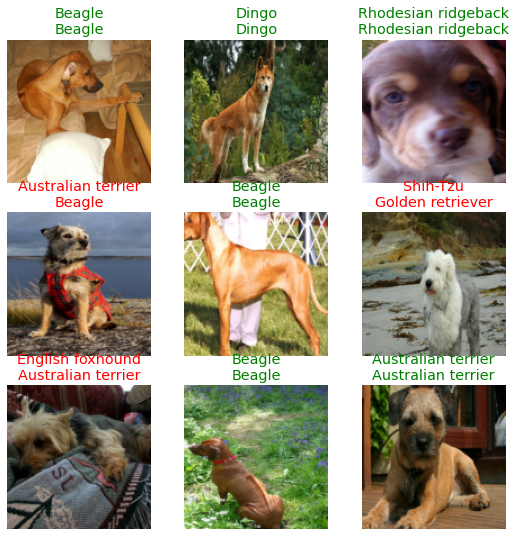

In [12]:
#train
print("xresnet50")
learn = cnn_learner(dls, xresnet50, metrics=accuracy, pretrained=False)
learn.fit_one_cycle(5, 5e-3)
learn.show_results()

xse\_resnet50


epoch,train_loss,valid_loss,accuracy,time
0,2.686444,2.353721,0.227030,01:29
1,2.212479,3.541941,0.216086,01:29
2,1.987012,3.462614,0.319165,01:29
3,1.637232,1.448509,0.489183,01:29
4,1.415331,1.320976,0.539832,01:29


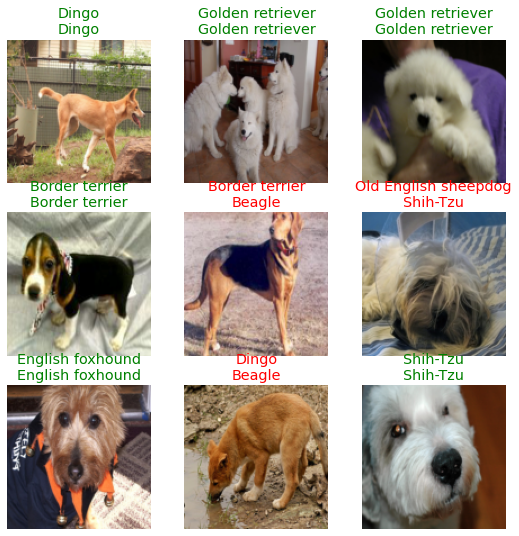

In [10]:
#train
print("xse\_resnet50")
learn = cnn_learner(dls, xse_resnext50, metrics=accuracy, pretrained=False)
learn.fit_one_cycle(5, 5e-3)
learn.show_results()
# https://docs.fast.ai/vision.models.xresnet.html#xse_resnet50
# def xresnet50 (pretrained=False, **kwargs): return _xresnet(pretrained, 4, [3, 4,  6, 3], **kwargs)
# def xse_resnet50(n_out=1000, pretrained=False, **kwargs):   return XResNet(SEBlock,  4, g1, n_out=n_out, **se_kwargs1, **kwargs)

xse\_resnet50


epoch,train_loss,valid_loss,accuracy,time
0,2.675225,2.570473,0.202087,01:28
1,2.231531,2.053533,0.273352,01:28
2,2.098034,2.123824,0.292441,01:28
3,1.713332,1.456309,0.485620,01:29
4,1.495011,1.373843,0.520998,01:29


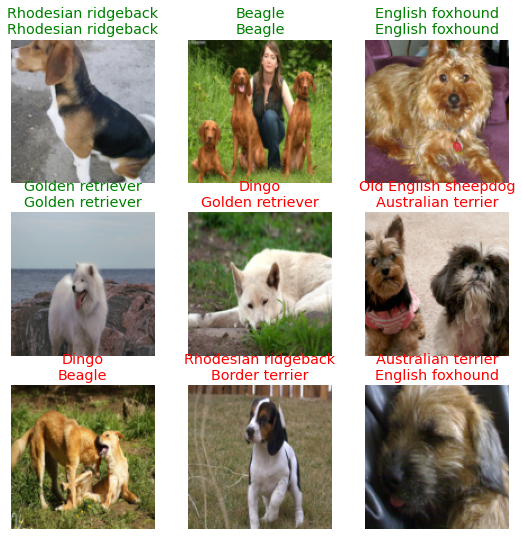

In [11]:
#train
print("xse\_resnet50")
learn = cnn_learner(dls, xse_resnext50, metrics=accuracy, pretrained=False)
learn.fit_one_cycle(5, 5e-3)
learn.show_results()

xresnet101


epoch,train_loss,valid_loss,accuracy,time
0,2.656592,2.738218,0.215322,01:37
1,2.224833,1.937005,0.321456,01:39
2,1.910352,2.049444,0.355561,01:39
3,1.663413,1.469102,0.486892,01:39
4,1.433056,1.328669,0.533469,01:39


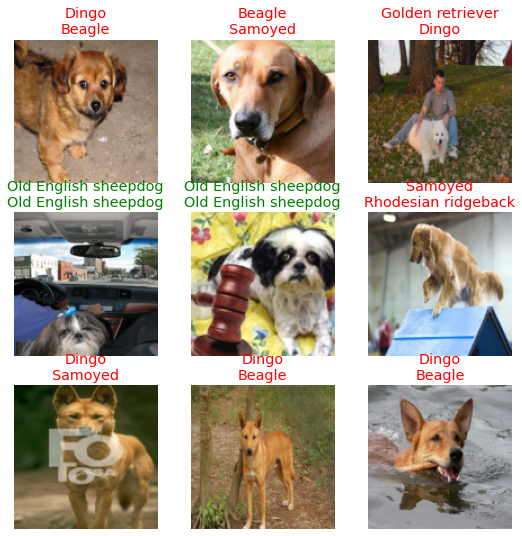

In [8]:
#train
print("xresnet101")
learn = cnn_learner(dls, xresnet101, metrics=accuracy, pretrained=False)
learn.fit_one_cycle(5, 5e-3)
learn.show_results()

xresnet101


epoch,train_loss,valid_loss,accuracy,time
0,2.633382,2.270235,0.257826,01:39
1,2.289658,1.944470,0.303640,01:39
2,2.148246,5.056967,0.273097,01:40
3,1.867933,1.645017,0.409519,01:39
4,1.668773,1.496313,0.477475,01:40


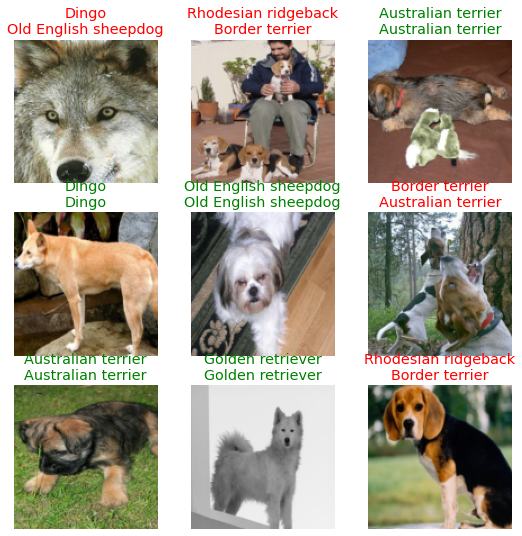

In [9]:
#train
print("xresnet101")
learn = cnn_learner(dls, xresnet101, metrics=accuracy, pretrained=False)
learn.fit_one_cycle(5, 5e-3)
learn.show_results()